### Exploratory Analysis for Simulated GWAS data (Optiomal)
##### This script will not be inlcluded in the final pipeline.

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def parse_gwas(location):
    with open(os.path.expanduser(location), "r") as file:
        return pd.read_csv(file, sep=",", index_col=0)

In [6]:
! pwd
! ls -lh

/home/jovyan/MR_simulation/Scripts
total 2.1M
-rw-r--r-- 1 jovyan users 1.1M Mar 12 13:46 ad_gwas.csv
-rw-r--r-- 1 jovyan users  18K Mar 12 15:11 exploratory_analysis.ipynb
-rw-r--r-- 1 jovyan users 1.5K Mar 12 13:54 generate_simulated_data.py
-rw-r--r-- 1 jovyan users 1.1M Mar 12 13:46 ldl_gwas.csv


In [37]:
ldl_c = parse_gwas("/home/jovyan/MR_simulation/Scripts/ldl_gwas.csv")

In [38]:
ad = parse_gwas("/home/jovyan/MR_simulation/Scripts/ad_gwas.csv")

In [39]:
print(f"ldl_c shape: {ldl_c.shape}, ad shape: {ad.shape}")

ldl_c shape: (10000, 8), ad shape: (10000, 8)


In [40]:
# Lets inspect the df
ldl_c.dtypes

CHR         int64
BP          int64
A1         object
A2         object
EAF       float64
BETA      float64
SE        float64
PVALUE    float64
dtype: object

In [41]:
ad.dtypes

CHR         int64
BP          int64
A1         object
A2         object
EAF       float64
BETA      float64
SE        float64
PVALUE    float64
dtype: object

In [42]:
# Check for missing values
ldl_c.isna().sum()

CHR       0
BP        0
A1        0
A2        0
EAF       0
BETA      0
SE        0
PVALUE    0
dtype: int64

In [43]:
# Check for missing values
ad.isna().sum()

CHR       0
BP        0
A1        0
A2        0
EAF       0
BETA      0
SE        0
PVALUE    0
dtype: int64

### Plot Manhattan / Scatter

In [48]:
df = ldl_c[["BP", "PVALUE", "CHR"]]
df2 = ad[["BP", "PVALUE", "CHR"]]

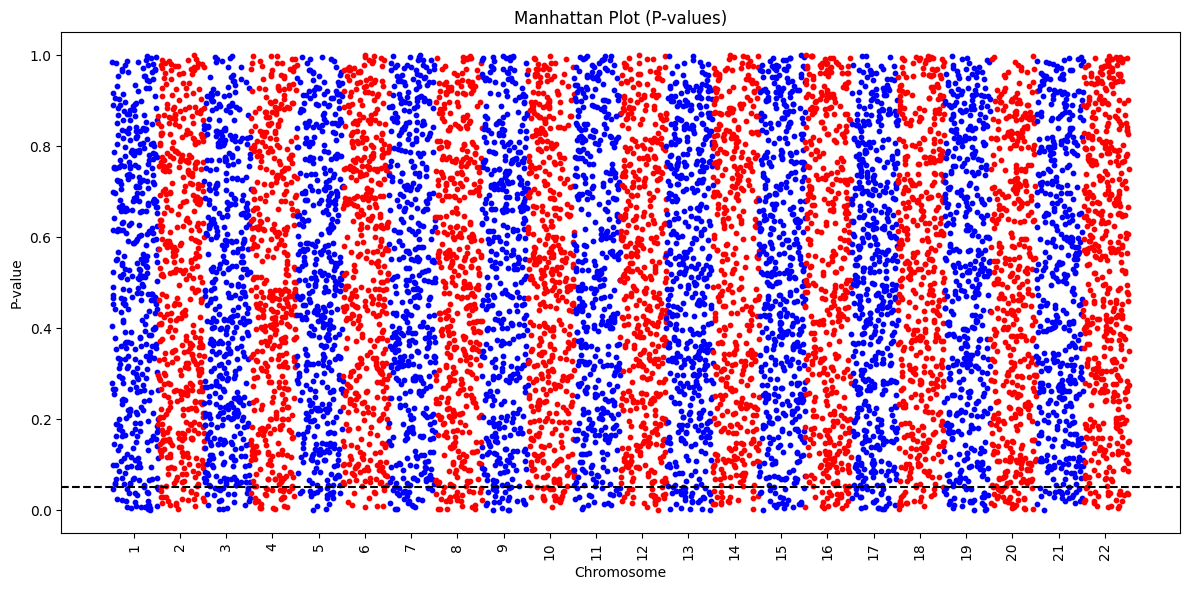

In [49]:
# Check for pval < 0.05
plt.figure(figsize=(12, 6))

# Scatter plot with chromosome-based coloring
chromosomes = df["CHR"].unique()
colors = ["blue", "red"] * (len(chromosomes) // 2 + 1)

x_labels = []
x_ticks = []
x_offset = 0

for i, chrom in enumerate(sorted(chromosomes)):
    subset = df[df["CHR"] == chrom]
    plt.scatter(subset["BP"] + x_offset, subset["PVALUE"], color=colors[i % 2], s=10)
    x_labels.append(chrom)
    x_ticks.append(x_offset + (subset["BP"].max() - subset["BP"].min()) / 2)
    x_offset += subset["BP"].max() - subset["BP"].min() + 1

plt.xticks(x_ticks, x_labels, rotation=90)
plt.axhline(y=0.05, color="black", linestyle="--", label="P = 0.05")
plt.title("Manhattan Plot (P-values)")
plt.xlabel("Chromosome")
plt.ylabel("P-value")
plt.tight_layout()

plt.show()

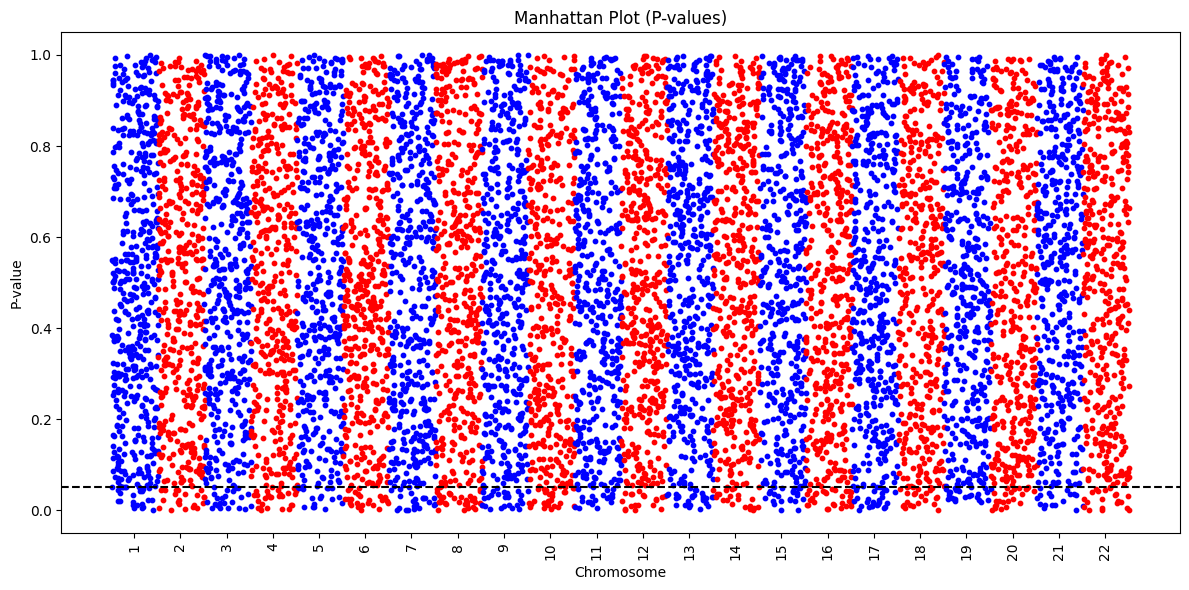

In [50]:
# Check for pval < 0.05
plt.figure(figsize=(12, 6))

# Scatter plot with chromosome-based coloring
chromosomes = df2["CHR"].unique()
colors = ["blue", "red"] * (len(chromosomes) // 2 + 1)

x_labels = []
x_ticks = []
x_offset = 0

for i, chrom in enumerate(sorted(chromosomes)):
    subset = df2[df2["CHR"] == chrom]
    plt.scatter(subset["BP"] + x_offset, subset["PVALUE"], color=colors[i % 2], s=10)
    x_labels.append(chrom)
    x_ticks.append(x_offset + (subset["BP"].max() - subset["BP"].min()) / 2)
    x_offset += subset["BP"].max() - subset["BP"].min() + 1

plt.xticks(x_ticks, x_labels, rotation=90)
plt.axhline(y=0.05, color="black", linestyle="--", label="P = 0.05")
plt.title("Manhattan Plot (P-values)")
plt.xlabel("Chromosome")
plt.ylabel("P-value")
plt.tight_layout()

plt.show()